In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
import numpy as np
from scipy import interpolate


def dvr(r, e, mu, interp=False):
    """
    Discrete Value Representation (DVR) 1-Dimensional

        r   : (array) potential surface position values
        e   : (array) potential surface energy values
        mu  : (float) reduce mass
    """

    if interp:
        cs = interpolate.CubicSpline(r, e)
        r_new = np.linspace(r[0], r[-1], 500)
        e_new = cs(r_new)

        r = r_new
        e = e_new

    N = len(r)
    mp = (r[1] - r[0])

    H = np.ndarray((N,N), dtype="float")

    for i in range(N):
        for j in range(N):
            if(i == j):
                H[i][j] = (1 / (2 * mu * mp**2)) * (np.pi**2 / 3) + e[i]

            else:
                H[i][j] = (-1)**(i - j) * (1 / (2 * mu * mp**2)) * (2/ (i-j)**2)

    Ev, eigvec = np.linalg.eigh(H)
    Cv = eigvec.transpose()
    
    return [r, e, Cv, Ev]

In [3]:
data_gs = np.loadtxt('test/n2_gs.txt', delimiter=',')
data_ex = np.loadtxt('test/n2_ex.txt', delimiter=',')

r_gs = data_gs[:, 0] * 1.88973
e_gs = data_gs[:, 1]

r_ex = data_gs[:, 0] * 1.88973
e_ex = data_ex[:, 1]
mu = (25526.042373971035 * 25526.042373971035) / (2*25526.042373971035)

r_gs, e_gs, Cv_gs, Ev_gs = dvr(r_gs, e_gs, mu, interp=True)
r_ex, e_ex, Cv_ex, Ev_ex = dvr(r_ex, e_ex, mu, interp=True)

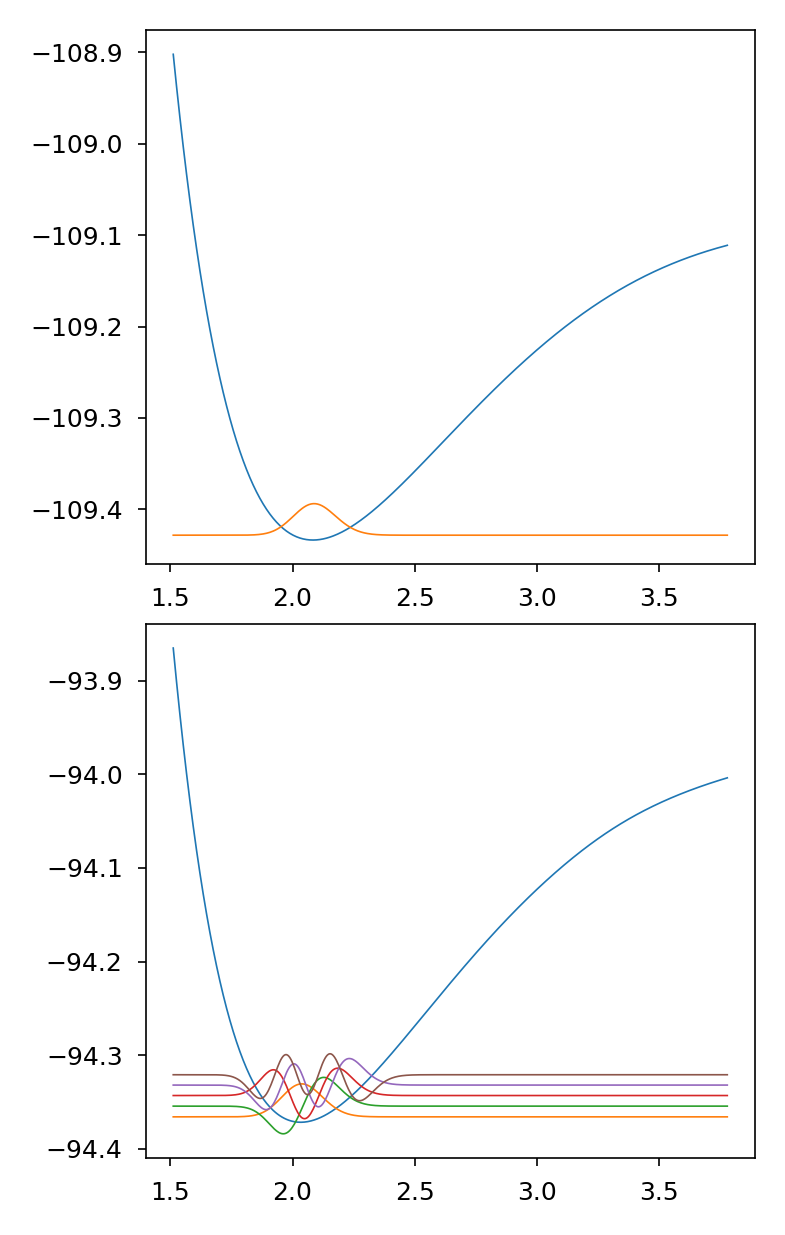

In [5]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['axes.linewidth'] = 0.4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['ytick.minor.size'] = 1
plt.rcParams['ytick.minor.width'] = 0.2

sf = 0.2

fig = plt.figure(figsize=(2.5, 4), dpi=300)
gs = GridSpec(2, 1)

###################################################################################
#----------------------------------------------------------------------------------
# Plot 1: Ground State
#----------------------------------------------------------------------------------
###################################################################################

ax1 = fig.add_subplot(gs[0])
ax1.plot(r_gs, e_gs, linewidth=0.4)
ax1.plot(r_gs, sf * Cv_gs[0] + Ev_gs[0], linewidth=0.4)


###################################################################################
#----------------------------------------------------------------------------------
# Plot 2: Excited state
#----------------------------------------------------------------------------------
###################################################################################

ax2 = fig.add_subplot(gs[1])
ax2.plot(r_ex, e_ex, linewidth=0.4)
ax2.plot(r_ex, sf * Cv_ex[0] + Ev_ex[0], linewidth=0.4)
ax2.plot(r_ex, sf * Cv_ex[1] + Ev_ex[1], linewidth=0.4)
ax2.plot(r_ex, sf * Cv_ex[2] + Ev_ex[2], linewidth=0.4)
ax2.plot(r_ex, sf * Cv_ex[3] + Ev_ex[3], linewidth=0.4)
ax2.plot(r_ex, sf * Cv_ex[4] + Ev_ex[4], linewidth=0.4)




# Axis Labels and Limits
#----------------------------------------------------------------------------------

fig.align_ylabels()
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
def franck_condon_factors()